<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Data_Visualization/blob/main/YellowBrick_py/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de estudos destinado a biblioteca YellowBrick e visualização de dados

In [1]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import pandas as pd

df = pd.read_csv(r'https://raw.githubusercontent.com/LucasPequenoSterzeck/Data_Visualization/main/YellowBrick_py/EURUSD_5m_23.csv', sep=';', decimal=',')

print(df.columns)

df.head(2)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Med_21', 'Med_7', 'Med_43',
       'Med_put_strong', 'Med_put_weak', 'Med_call_strong', 'Med_call_weak',
       '%K', '%D', 'over_call', 'over_put', 'bollinger_up', 'bollinger_down',
       'bollinger_up_REVERSE', 'bollinger_down_REVERSE', 'RSI',
       'RSI_up_REVERSE', 'RSI_down_REVERSE', 'SAR_bear', 'SAR_bull',
       'Movimento', 'PIP'],
      dtype='object')


,Date,Open,High,Low,Close,Med_21,Med_7,Med_43,Med_put_strong,Med_put_weak,...,bollinger_down,bollinger_up_REVERSE,bollinger_down_REVERSE,RSI,RSI_up_REVERSE,RSI_down_REVERSE,SAR_bear,SAR_bull,Movimento,PIP
0,2023-01-18 08:10:00,1.07846,1.07876,1.07846,1.07854,1.077571,1.078074,1.077608,0,0,...,1.076621,1,0,63.416310,0,0,0,0,0,0.009
1,2023-01-18 08:15:00,1.07853,1.07870,1.07832,1.07852,1.077620,1.078196,1.077597,0,0,...,1.076581,0,0,62.956338,0,0,0,0,1,-0.002


# Métricas de modelo M.L.

> Precison

> Recall

> F1

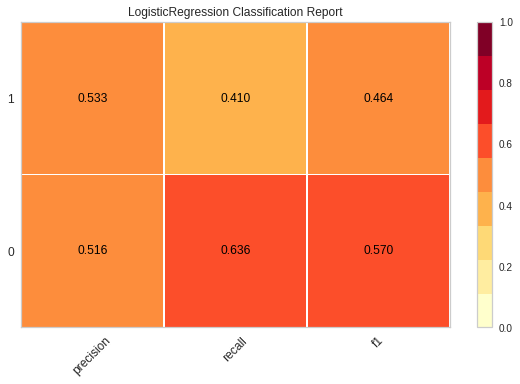

In [129]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans

dict_lr = {'C': 10, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 0.1, 'l1_ratio': 0.0, 'max_iter': 10000, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.1, 'warm_start': True}
model = LogisticRegression(**dict_lr)
model1 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',init=None, learning_rate=0.06, loss='squared_error', max_depth=5,max_features=1.0, max_leaf_nodes=None,min_impurity_decrease=0.15,min_samples_leaf=3, min_samples_split=10,min_weight_fraction_leaf=0.1, n_estimators=7,n_iter_no_change=2,random_state=2871, subsample=1.0, tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False)

visualizer = ClassificationReport(model)

df = df[['%K','Movimento','Close','%D','RSI']]

y = df.Movimento
X = df.drop(columns=['Movimento'])

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show()

In [121]:
import plotly.express as px

fig = px.imshow(df[['%K','Movimento','Close','%D','RSI']])
fig.show()

**Precison** Precision measures the proportion of positive prediction results that are correct. Recall (the same as TPR) measures the probability of detection or the proportion of actual positives that were predicted correctly. Even though we want to maximize both metrics, it’s not realistic, so we need to find the tradeoff between them.

**Formula da precisão:** TP / (TP + FP)

-----------------------

Recall

F1